# Restricted Boltzmann Machines

### Energy-based model
Energy-based models associate a scalar energy to each configuration of the variables of interest. Low energy is more desirable. The probability distribution based on an energy function can be defined as follows
$$ \Pr(x) = \frac{\exp (-E(x))}{Z}\,,$$
where $Z = \sum_{x} \exp (-E(x))$ denotes the normalization factor or **partition function**. 

### Restricted Boltzmann Machine

Restricted Boltzmann Machine (RBM) has an efficient training algorithm. In order to increase the expressive power of the model, we do not observe the example $x$ fully, we also want to introduce some non-observed variables.  Consider an observed part $x$ and a hidden part $h$. We can then write:
$$\Pr(x) = \sum_h \frac{\exp (-E(x, h))}{Z} \,.$$

In RBM, the energy function is defined as
$$
E(x, h) = -a^\top x - b^\top h - x^\top W h \,.
$$

To make RBM as an energy-based model, the free energy function is computed as follows
$$
\begin{align}
F(x) &= -\log \sum_h \exp (-E(x, h)) \\
     &= -a^\top x - \sum_j \log (1 + \exp(W^{\top}_jx + b_j))\,.
\end{align}
$$

We have an tractable expression for the conditional probabilities
$$
\Pr (h|x) = \prod_i \Pr (h_i | x)
$$

In [1]:
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.utils import make_grid

from rbm import RBM
from libs import train, show_and_save

Make some configurations

In [2]:
batch_size = 64 # batch size
n_epochs = 10 # number of epochs
lr = 0.01 # learning rate
n_hid = 128 # number of neurons in the hidden layer
n_vis = 784 # input size

print(f'batch_size: {batch_size}')
print(f'n_epochs: {n_epochs}')
print(f'lr: {lr}')
print(f'n_hid: {n_hid}')
print(f'n_vis: {n_vis}')

batch_size: 64
n_epochs: 10
lr: 0.01
n_hid: 128
n_vis: 784


Create a RBM model

In [3]:
# create a Restricted Boltzmann Machine
model = RBM(n_vis=n_vis, n_hid=n_hid, k=1)




Prepare the data set

In [4]:
# train_loader = torch.utils.data.DataLoader(
#     datasets.MNIST('./output', train=True, download=True,
#                    transform=transforms.Compose([
#                        transforms.ToTensor()
#                    ])),
#     batch_size=batch_size
# )

base_dir = '/Users/yishai/Desktop/GenerativeTabularFusion'
import os
os.chdir(base_dir)    
from app.dotenv import base_dir, data_dir
from app.load_data.MNIST import data_loaders
train_loader, test_loader = data_loaders(batch_size,data_dir)

train size:  60000 test size:  10000
batch size: torch.Size([64, 1, 28, 28])


In [5]:
# from torchsummary import summary
# # INPUT_SHAPE = next(iter(train_loader))[0].view(-1, 784).shape
# summary(model, (1,64,784))

Then train the model.

In [6]:
model = train(model, train_loader, n_epochs=n_epochs, lr=lr)

Epoch 0	 Loss=46.6979
Epoch 1	 Loss=-1.0172
Epoch 2	 Loss=-0.7498
Epoch 3	 Loss=-0.3129
Epoch 4	 Loss=0.2178
Epoch 5	 Loss=0.4744
Epoch 6	 Loss=0.7886
Epoch 7	 Loss=1.2015
Epoch 8	 Loss=1.3738
Epoch 9	 Loss=1.4460


In [7]:
images = next(iter(train_loader))[0]
v, v_gibbs = model(images.view(-1, 784))

FileNotFoundError: [Errno 2] No such file or directory: './output/real.png'

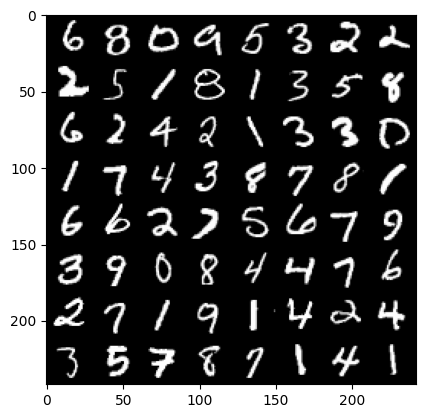

In [8]:
# show the real images
show_and_save(make_grid(v.view(batch_size, 1, 28, 28).data), 'output/real')

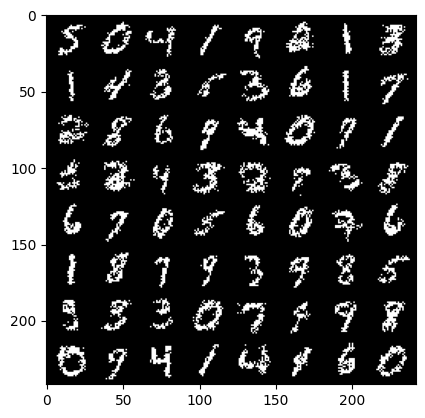

In [ ]:
# show the generated images
show_and_save(make_grid(v_gibbs.view(batch_size, 1, 28, 28).data), 'output/fake')

How one image is factorized through the hidden variables

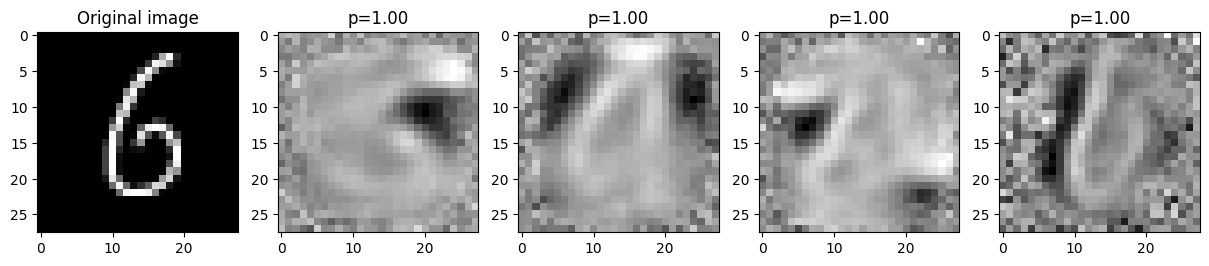

In [ ]:
n_sample = 4
kth = 18
d = images[kth:kth+1]

V = torch.sigmoid(F.linear(d.view(1, -1), model.W, model.h))
v, o = torch.sort(V.view(-1))

fig, ax = plt.subplots(1, n_sample + 1, figsize=(3*(1 + n_sample),3))
ax[0].imshow(d.view(28, 28).numpy(), cmap='gray')
ax[0].set_title('Original image')

for k, i in enumerate(o[-n_sample:].numpy()):
    f = model.W[i].view(28, 28).data.numpy()
    ax[k + 1].imshow(f, cmap='gray')
    ax[k + 1].set_title('p=%.2f'% V[0][i].item())
    
plt.savefig('output/factor.png', dpi=200)